In [2]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, ttest_rel

# read data main file

In [3]:
ETP_main = pd.read_stata('Data/ETP_main.dta')

In [21]:
ETP_main

,pupilid,schoolid,baseline,district,bungoma,etpschool,tracking,sbm,girl,etpschool_girl,...,std_letterscore,std_wordscore,std_sentscore,std_spellscore,std_additions_score,std_substractions_score,std_multiplications_score,schoolPTR,total_1,total_2
0,4301003,430,1,BUNGOMA,1,1,1,1,1,1,...,-1.075680,-0.698297,0.362425,-0.621864,-1.056541,-0.821877,-0.565649,45.846153,111.0,86.0
1,4301001,430,1,BUNGOMA,1,1,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.846153,111.0,86.0
2,4301005,430,1,BUNGOMA,1,1,1,1,0,0,...,-0.545307,-0.698297,-0.642568,-0.621864,0.343626,1.089532,-0.565649,45.846153,111.0,86.0
3,4301019,430,1,BUNGOMA,1,1,1,1,0,0,...,-1.075680,-0.698297,-0.307570,-0.621864,-0.589819,-1.299729,-0.565649,45.846153,111.0,86.0
4,4301012,430,1,BUNGOMA,1,1,1,1,0,0,...,0.462402,-0.698297,0.194926,-0.621864,-0.123096,0.133828,1.353673,45.846153,111.0,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12213,10201051,1020,1,BUNGOMA,1,1,1,1,0,0,...,0.197216,2.323765,0.697423,1.450668,1.277071,1.567384,2.313334,32.099998,56.0,60.0
12214,10201034,1020,1,BUNGOMA,1,1,1,1,0,0,...,-0.704419,-0.698297,-0.642568,-0.621864,0.810349,1.089532,-0.565649,32.099998,56.0,60.0
12215,10201038,1020,1,BUNGOMA,1,1,1,1,0,0,...,1.629223,2.323765,1.032420,1.105246,0.343626,1.089532,2.313334,32.099998,56.0,60.0
12216,10201055,1020,1,BUNGOMA,1,1,1,1,1,1,...,1.841373,2.323765,5.387391,2.141512,1.743794,1.089532,2.313334,32.099998,56.0,60.0


In [21]:
ETP_main.totalscore.max()

43.099998474121094

In [38]:
ETP_main.ptatchsalary1_2005.value_counts()

1500.0    2122
1000.0    1841
2000.0    1219
1200.0     422
2500.0     335
0.0        237
800.0      221
500.0      220
3000.0     130
700.0      124
1300.0     103
1850.0      68
4000.0      62
1800.0      62
Name: ptatchsalary1_2005, dtype: int64

# tmp (miss)

In [4]:
len(ETP_main.loc[
    (ETP_main.etpschool==1) & (ETP_main.streaming=='TRACKING'),
    'schoolid'].unique())

69

In [72]:
ETP_main.etpschool.unique()

array([1, 0], dtype=int8)

In [57]:
ETP_main.streaming.unique()

array(['TRACKING', 'RANDOM', ''], dtype=object)

In [58]:
ETP_main[ETP_main.streaming=='']

,pupilid,schoolid,baseline,district,bungoma,etpschool,tracking,sbm,girl,etpschool_girl,...,std_letterscore,std_wordscore,std_sentscore,std_spellscore,std_additions_score,std_substractions_score,std_multiplications_score,schoolPTR,total_1,total_2
249,4411078,441,1,BUNGOMA,1,0,0,0,1,0,...,-0.704419,-0.423564,0.697423,-0.621864,-1.523264,-1.299729,-0.565649,46.75000,158.0,121.0
250,4411051,441,1,BUNGOMA,1,0,0,0,1,0,...,-1.075680,-0.698297,0.864922,-0.621864,-1.523264,-1.299729,-0.565649,46.75000,158.0,121.0
251,4411102,441,1,BUNGOMA,1,0,0,0,0,0,...,-0.386195,-0.423564,-0.642568,-0.621864,-1.056541,-1.299729,-0.565649,46.75000,158.0,121.0
252,4411105,441,1,BUNGOMA,1,0,0,0,0,0,...,-0.333158,-0.698297,-0.642568,-0.621864,-0.589819,0.133828,-0.565649,46.75000,158.0,121.0
253,4411140,441,1,BUNGOMA,1,0,0,0,1,0,...,-1.075680,-0.423564,-0.642568,-0.621864,-0.589819,0.133828,-0.565649,46.75000,158.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12158,10191061,1019,1,BUNGOMA,1,0,0,0,0,0,...,-0.439232,-0.423564,-0.642568,-0.621864,-0.123096,-0.821877,-0.565649,36.81818,63.0,68.0
12159,10191049,1019,1,BUNGOMA,1,0,0,0,0,0,...,-1.075680,-0.698297,0.362425,-0.621864,-1.523264,-0.344025,-0.565649,36.81818,63.0,68.0
12160,10191070,1019,1,BUNGOMA,1,0,0,0,0,0,...,0.038104,-0.698297,-0.642568,-0.621864,0.810349,0.611680,1.353673,36.81818,63.0,68.0
12161,10191032,1019,1,BUNGOMA,1,0,0,0,0,0,...,0.303290,-0.698297,-0.307570,-0.621864,-0.123096,1.089532,1.353673,36.81818,63.0,68.0


In [16]:
len(np.unique(ETP_main.loc[
    (ETP_main['etpgroup']=='ETP'), 'schoolid'
]))

138

In [15]:
len(np.unique(
    ETP_main.loc[
    (ETP_main['etpgroup']=='ETP') &
    (ETP_main['streaming']=='TRACKING'), 'schoolid'
]))

69

In [30]:
df = (
    ETP_main
#     [~ETP_main['totalscore'].isnull()]
    [['etpgroup', 'std_mark', 'totalscore', 'r2_totalscore']]
)

In [31]:
df['delta_y'] = df['totalscore'] - df['std_mark']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
df

,etpgroup,std_mark,totalscore,r2_totalscore,delta_y
0,ETP,-2.145025,2.900000,3.050000,5.045025
1,ETP,-2.340687,NaN,7.200000,NaN
2,ETP,-1.809605,9.857142,NaN,11.666747
3,ETP,-0.747440,2.300000,7.000000,3.047440
4,ETP,-0.985029,11.235714,19.314285,12.220743
...,...,...,...,...,...
12213,ETP,1.449730,27.357143,39.200001,25.907413
12214,ETP,-0.599930,10.600000,16.857143,11.199930
12215,ETP,0.576104,26.371429,38.985714,25.795326
12216,ETP,2.088148,35.414284,39.442856,33.326134


# Basic EXAM scores and difference between treatment/control

In [34]:
ttest_ind(
    df[df['etpgroup']=='ETP'].delta_y, 
    df[df['etpgroup']!='ETP'].delta_y,
    nan_policy='omit'
)

Ttest_indResult(statistic=10.691008117761543, pvalue=1.5602432952474608e-26)

In [35]:
ttest_ind(
    df[df['etpgroup']=='ETP'].r2_totalscore, 
    df[df['etpgroup']!='ETP'].r2_totalscore,
    nan_policy='omit'
)

Ttest_indResult(statistic=4.661059966147195, pvalue=3.189103824831934e-06)

In [36]:
df[df['etpgroup']=='ETP'].delta_y.mean(), df[df['etpgroup']=='ETP'].delta_y.std()

(13.184248924255371, 8.841071128845215)

In [37]:
df[df['etpgroup']!='ETP'].delta_y.mean(), df[df['etpgroup']!='ETP'].delta_y.std()

(11.212160110473633, 8.334612846374512)

# Attendance of students and difference between treatment/control

In [46]:
df_att = (
    ETP_main
#     [~ETP_main['totalscore'].isnull()]
    [['etpgroup', 'pres05v1', 'pres05v2', 'pres05v3', 'pres06v0', 'pres06v1', 'pres06v2', 'pres06v3']]
    .fillna(0)
)

In [47]:
df_att['att'] = df_att['pres05v1']
for i in df_att.columns[2:]:
    df_att['att'] += df_att[i]

In [49]:
df_att

,etpgroup,pres05v1,pres05v2,pres05v3,pres06v0,pres06v1,pres06v2,pres06v3,att
0,ETP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,ETP,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
2,ETP,1.0,1.0,1.0,1.0,0.0,2.0,2.0,16.0
3,ETP,1.0,1.0,1.0,0.0,0.0,0.0,0.0,6.0
4,ETP,1.0,1.0,1.0,1.0,1.0,2.0,2.0,18.0
...,...,...,...,...,...,...,...,...,...
12213,ETP,1.0,1.0,1.0,1.0,1.0,1.0,1.0,14.0
12214,ETP,0.0,0.0,1.0,1.0,1.0,1.0,1.0,10.0
12215,ETP,0.0,1.0,1.0,2.0,1.0,1.0,1.0,14.0
12216,ETP,1.0,1.0,1.0,1.0,1.0,1.0,1.0,14.0


In [50]:
ttest_ind(
    df_att[df_att['etpgroup']=='ETP'].att, 
    df_att[df_att['etpgroup']!='ETP'].att,
)

Ttest_indResult(statistic=14.377796351951913, pvalue=1.7079825273231622e-46)

In [51]:
df_att[df_att['etpgroup']=='ETP'].att.mean(), df_att[df_att['etpgroup']=='ETP'].att.std()

(10.461804270023448, 4.048153874649359)

In [53]:
df_att[df_att['etpgroup']!='ETP'].att.mean(), df_att[df_att['etpgroup']!='ETP'].att.std()

(9.390522478736331, 3.565875318997434)

In [54]:
%%timeit
df_att[df_att['etpgroup']=='ETP'].att

1.09 ms ± 16.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [55]:
%%timeit
df_att.loc[df_att['etpgroup']=='ETP', 'att']

817 µs ± 5.99 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## construct DF (run)

In [96]:
tr_group = ETP_main.loc[
    (ETP_main['etpgroup']=='ETP'), [i for i in ETP_main.columns]
]

In [111]:
ETP_main.std_mark.mean(), ETP_main.totalscore.mean()/ETP_main.totalscore.max()

(0.012593376450240612, 0.2913979414441294)

In [107]:
tr_group.std_mark.mean(), ctrl_group.std_mark.mean()

(0.012073648162186146, 0.013616768643260002)

In [109]:
tr_group.totalscore.mean()/tr_group.totalscore.max(), ctrl_group.totalscore.mean()/ctrl_group.totalscore.max()

(0.30651164420892646, 0.2696281264851133)

In [101]:
3982/(4121+3982)

0.4914229297790942

In [97]:
ctrl_group = ETP_main.loc[
    (ETP_main['etpgroup']!='ETP'), [i for i in ETP_main.columns]
]

In [102]:
ctrl_group.groupby('girl').count()

,pupilid,schoolid,baseline,district,bungoma,etpschool,tracking,sbm,etpschool_girl,etpteacher_girl,...,std_letterscore,std_wordscore,std_sentscore,std_spellscore,std_additions_score,std_substractions_score,std_multiplications_score,schoolPTR,total_1,total_2
girl,,,,,,,,,,,,,,,,,,,,,
0,2065,2065,2065,2065,2065,2065,2065,2065,2065,2065,...,1690,1687,1690,1690,1690,1690,1690,2065,2031,2003
1,2050,2050,2050,2050,2050,2050,2050,2050,2050,2050,...,1620,1620,1620,1620,1620,1620,1620,2050,2019,1987


In [103]:
2050/(2050+2065)

0.49817739975698666

In [57]:
df = (
    ETP_main
    [['etpgroup', # treatment
      'girl', 'std_mark','realpercentile', 'kcpe2001', 'kcpe2004', # pretreatment vars
      'total_2004', 'rotation', 'total1_2005', 'streams1_2005',    # pretreatment vars
      'init_clsize', 'Nteachers', 'gradesize', 'schoolsize',       # pretreatment vars
      'ptatchsalary1_2005', 'schoolid', 'streamsize',
      'totalscore', 'Nteachers_prim', # Y1 Y2 'schoolid' # potential clusters
     ]] 
    .dropna()
)

In [58]:
df

,etpgroup,girl,std_mark,realpercentile,kcpe2001,kcpe2004,total_2004,rotation,total1_2005,streams1_2005,init_clsize,Nteachers,gradesize,schoolsize,ptatchsalary1_2005,schoolid,streamsize,totalscore,Nteachers_prim
123,ETP,0,-1.421576,4.0,216.190002,230.0,638,1,116.0,1,116.0,13,72.0,0.73,0.0,436,37.0,7.871428,14
124,ETP,0,-1.820578,8.0,216.190002,230.0,638,1,116.0,1,116.0,13,72.0,0.73,0.0,436,37.0,0.257143,14
125,ETP,0,-0.725278,38.0,216.190002,230.0,638,1,116.0,1,116.0,13,72.0,0.73,0.0,436,37.0,8.250000,14
127,ETP,1,-0.052451,49.0,216.190002,230.0,638,1,116.0,1,116.0,13,72.0,0.73,0.0,436,37.0,10.400000,14
128,ETP,1,-0.936514,15.0,216.190002,230.0,638,1,116.0,1,116.0,13,72.0,0.73,0.0,436,37.0,2.057143,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11982,CONTROL,1,0.786787,85.0,235.190002,262.0,383,1,51.0,1,51.0,10,52.0,0.52,1500.0,1016,52.0,9.600000,12
11984,CONTROL,0,0.452645,63.0,235.190002,262.0,383,1,51.0,1,51.0,10,52.0,0.52,1500.0,1016,52.0,9.600000,12
11985,CONTROL,1,-1.611611,10.0,235.190002,262.0,383,1,51.0,1,51.0,10,52.0,0.52,1500.0,1016,52.0,2.100000,12
11987,CONTROL,1,-0.327020,33.0,235.190002,262.0,383,1,51.0,1,51.0,10,52.0,0.52,1500.0,1016,52.0,12.185715,12


- treatment - ETP group 
- Y2 - издержки (количество учителей => зп им больше)
- Y1 - эффект (зависимая переменная - успеваемость)
- cluster - условно , можно взять регион


In [59]:
df['treatment'] = df['etpgroup'] == 'ETP'
df['treatment'] = df['treatment'].map(int)

In [60]:
df = df.rename(
    {
        'totalscore': 'Y1',
        'ptatchsalary1_2005': 'Y2', 
#         'bungoma': 'cluster' # we can pick schoolid here
    },
    axis=1
)

In [61]:
df = df.drop('etpgroup', axis=1)

In [62]:
df

,girl,std_mark,realpercentile,kcpe2001,kcpe2004,total_2004,rotation,total1_2005,streams1_2005,init_clsize,Nteachers,gradesize,schoolsize,Y2,schoolid,streamsize,Y1,Nteachers_prim,treatment
123,0,-1.421576,4.0,216.190002,230.0,638,1,116.0,1,116.0,13,72.0,0.73,0.0,436,37.0,7.871428,14,1
124,0,-1.820578,8.0,216.190002,230.0,638,1,116.0,1,116.0,13,72.0,0.73,0.0,436,37.0,0.257143,14,1
125,0,-0.725278,38.0,216.190002,230.0,638,1,116.0,1,116.0,13,72.0,0.73,0.0,436,37.0,8.250000,14,1
127,1,-0.052451,49.0,216.190002,230.0,638,1,116.0,1,116.0,13,72.0,0.73,0.0,436,37.0,10.400000,14,1
128,1,-0.936514,15.0,216.190002,230.0,638,1,116.0,1,116.0,13,72.0,0.73,0.0,436,37.0,2.057143,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11982,1,0.786787,85.0,235.190002,262.0,383,1,51.0,1,51.0,10,52.0,0.52,1500.0,1016,52.0,9.600000,12,0
11984,0,0.452645,63.0,235.190002,262.0,383,1,51.0,1,51.0,10,52.0,0.52,1500.0,1016,52.0,9.600000,12,0
11985,1,-1.611611,10.0,235.190002,262.0,383,1,51.0,1,51.0,10,52.0,0.52,1500.0,1016,52.0,2.100000,12,0
11987,1,-0.327020,33.0,235.190002,262.0,383,1,51.0,1,51.0,10,52.0,0.52,1500.0,1016,52.0,12.185715,12,0


In [63]:
df.loc[
    df.treatment==0, 'Y2'
] = 0

In [64]:
df = (
    df
    .drop(
        df[
            (df.treatment==1) & (df.Y2==0)
        ].index
    )
)

In [65]:
df[df.treatment==1].Y2.unique()

array([1500., 1000., 1200., 2000.,  500., 1300., 2500.,  800., 3000.,
       1850.,  700.])

In [66]:
df.loc[
    df.treatment==0, 'Y2'
] = 0

In [67]:
df.treatment.value_counts()

1    3077
0    2030
Name: treatment, dtype: int64

In [68]:
df.Y1.max(), df.Y1.min()

(41.70000076293945, 0.0)

In [69]:
df['costs'] = df['Y2']/df['streamsize']

In [71]:
df[df.costs!=0].costs.min(), df.costs.max()

(12.698412698412698, 113.63636363636364)

In [39]:
df[df.treatment==1]['costs'].value_counts()

14.285714    104
20.408163    100
24.000000     93
54.054054     85
22.727273     79
            ... 
30.769231     19
30.612245     19
26.666667     19
13.114754     16
76.923077     12
Name: costs, Length: 83, dtype: int64

In [52]:
df[df.treatment==0]['costs'].value_counts()

12.048193    107
24.590164     98
15.000000     94
26.785714     92
23.809524     82
14.851485     58
17.045455     58
13.761468     56
22.500000     56
13.986014     54
9.848485      54
29.761905     53
22.727273     53
32.051282     51
10.869565     51
7.000000      51
23.668639     50
28.985507     50
12.931034     50
9.933775      49
23.076923     47
18.518519     47
15.463918     47
18.072289     46
32.520325     46
0.000000      45
13.513514     44
7.142857      44
9.615385      44
21.276596     44
16.129032     43
29.411765     42
12.903226     41
28.846154     39
19.417476     39
12.145749     36
20.000000     35
32.786885     34
Name: costs, dtype: int64

In [72]:
df['costs'].value_counts()

0.000000     2030
14.285714     104
20.408163     100
24.000000      93
54.054054      85
             ... 
30.612245      19
37.037037      19
26.666667      19
13.114754      16
76.923077      12
Name: costs, Length: 84, dtype: int64

In [73]:
df['Y2']

249      0.0
250      0.0
251      0.0
252      0.0
253      0.0
        ... 
11982    0.0
11984    0.0
11985    0.0
11987    0.0
11988    0.0
Name: Y2, Length: 5107, dtype: float64

In [75]:
df.dtypes

girl                 int8
std_mark          float32
realpercentile    float64
kcpe2001          float32
kcpe2004          float64
total_2004          int16
rotation             int8
total1_2005       float64
streams1_2005        int8
init_clsize       float32
Nteachers            int8
gradesize         float64
schoolsize        float32
Y2                float64
schoolid            int16
streamsize        float64
Y1                float32
Nteachers_prim       int8
treatment           int64
costs             float64
dtype: object

In [76]:
df = df.astype({'costs': int})

In [77]:
df

,girl,std_mark,realpercentile,kcpe2001,kcpe2004,total_2004,rotation,total1_2005,streams1_2005,init_clsize,Nteachers,gradesize,schoolsize,Y2,schoolid,streamsize,Y1,Nteachers_prim,treatment,costs
249,1,1.249971,86.0,254.460007,256.0,748,0,158.0,1,158.0,10,143.0,1.46,0.0,441,143.0,2.300000,16,0,0
250,1,0.874314,79.0,254.460007,256.0,748,0,158.0,1,158.0,10,143.0,1.46,0.0,441,143.0,1.350000,16,0,0
251,0,1.603088,94.0,254.460007,256.0,748,0,158.0,1,158.0,10,143.0,1.46,0.0,441,143.0,2.614286,16,0,0
252,0,0.250724,64.0,254.460007,256.0,748,0,158.0,1,158.0,10,143.0,1.46,0.0,441,143.0,6.200000,16,0,0
253,1,-0.710957,31.0,254.460007,256.0,748,0,158.0,1,158.0,10,143.0,1.46,0.0,441,143.0,5.500000,16,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11982,1,0.786787,85.0,235.190002,262.0,383,1,51.0,1,51.0,10,52.0,0.52,0.0,1016,52.0,9.600000,12,0,0
11984,0,0.452645,63.0,235.190002,262.0,383,1,51.0,1,51.0,10,52.0,0.52,0.0,1016,52.0,9.600000,12,0,0
11985,1,-1.611611,10.0,235.190002,262.0,383,1,51.0,1,51.0,10,52.0,0.52,0.0,1016,52.0,2.100000,12,0,0
11987,1,-0.327020,33.0,235.190002,262.0,383,1,51.0,1,51.0,10,52.0,0.52,0.0,1016,52.0,12.185715,12,0,0


In [112]:
df['Y2']=df['costs'] * 0.013765/ 1.3235

In [ ]:
### конкретная оценка mean CER

In [118]:
2.663397/0.3511108

7.585631088533876

In [117]:
(
    df[df.treatment==1].Y1.mean() - df[df.treatment==0].Y1.mean()
)/(df[df.treatment==1].Y2.mean() - df[df.treatment==0].Y2.mean()) 

6.9072346298258145

In [122]:
6.9072346298258145/df.Y1.max()

0.16564111519068758

In [121]:
from scipy import stats

merged = pd.merge(
    df[df.treatment==0].std_mark.value_counts().to_frame(),
    df[df.treatment==1].std_mark.value_counts().to_frame(),
    left_index=True,
    right_index=True)

stats.ks_2samp(merged.std_mark_x, merged.std_mark_y)

Ks_2sampResult(statistic=1.0, pvalue=1.0)

In [98]:
stats.ks_2samp(df[df.treatment==0].std_mark,df[df.treatment==1].std_mark)

Ks_2sampResult(statistic=0.01741892413280801, pvalue=1.0)

In [99]:
stats.ttest_ind(df[df.treatment==0].std_mark,df[df.treatment==1].std_mark, nan_policy='omit')

Ttest_indResult(statistic=0.014483163638878365, pvalue=0.988445077282154)

In [102]:
print(stats.ks_2samp(df[df.treatment==0].Nteachers_prim, df[df.treatment==1].Nteachers_prim))
stats.ttest_ind(df[df.treatment==0].Nteachers_prim,df[df.treatment==1].Nteachers_prim, nan_policy='omit')

Ks_2sampResult(statistic=0.06931868575206802, pvalue=0.9990596342137296)


Ttest_indResult(statistic=0.06376224139922111, pvalue=0.9491620404620119)

In [103]:
print(stats.ks_2samp(df[df.treatment==0].streamsize, df[df.treatment==1].streamsize))
stats.ttest_ind(df[df.treatment==0].streamsize,df[df.treatment==1].streamsize, nan_policy='omit')

Ks_2sampResult(statistic=0.6988189827274023, pvalue=0.9990549790011842)


Ttest_indResult(statistic=68.35922902038948, pvalue=0.0)

In [109]:

print(stats.ks_2samp(df[df.treatment==0].girl, df[df.treatment==1].girl))
stats.ttest_ind(df[df.treatment==0].girl,df[df.treatment==1].girl, nan_policy='omit')

Ks_2sampResult(statistic=0.002300558249590558, pvalue=1.0)


Ttest_indResult(statistic=-0.16088261639079687, pvalue=0.8721922199578549)

In [107]:

print(stats.ks_2samp(df[df.treatment==0].total_2004, df[df.treatment==1].total_2004))
stats.ttest_ind(df[df.treatment==0].total_2004,df[df.treatment==1].total_2004, nan_policy='omit')

Ks_2sampResult(statistic=0.18862592474597, pvalue=0.9990549790011842)


Ttest_indResult(statistic=0.15341136125520133, pvalue=0.8780799494527927)

In [55]:
ls

Code/                         READ_ME_ETP_JPubE.pdf
Codebooks/                    Results/
Data/                         Surveys and Obs Sheets/
Dufflo_data.csv               ado files/
Dufflo_data_new.csv           heterogeneous_marginal_costs/
Dufflo_notebook.ipynb


In [56]:
df.to_csv('heterogeneous_marginal_costs/Dufflo_data_new_0.csv', index=False)

In [81]:
df.columns

Index(['girl', 'std_mark', 'realpercentile', 'kcpe2001', 'kcpe2004',
       'total_2004', 'rotation', 'total1_2005', 'streams1_2005', 'init_clsize',
       'Nteachers', 'gradesize', 'schoolsize', 'Y2', 'Y1', 'Nteachers_prim',
       'treatment'],
      dtype='object')

In [1]:
df['costs'].mean()

NameError: name 'df' is not defined

In [90]:
df[['schoolid', 'Y2']].head(100)

,schoolid,Y2
123,436,0.0
124,436,0.0
125,436,0.0
127,436,0.0
128,436,0.0
...,...,...
307,441,2000.0
308,441,2000.0
309,441,2000.0
310,441,2000.0


In [80]:
df.loc[df.treatment==0].Y2.value_counts()

1500.0    831
1000.0    523
2000.0    278
2500.0    104
1200.0     88
1800.0     56
1300.0     54
700.0      51
0.0        45
Name: Y2, dtype: int64

In [6]:
ETP_teacher = pd.read_stata('Data/Teacher Information/ETP_teacherinfo.dta')

In [7]:
ETP_teacher

,schoolid,teacherid,district,year,realdate,visit,no,visitno,etpschool,etp,...,schsize,sdkcpe,missingKCPE,kcpe2004,kcpe2003,kcpe2002,kcpe2001,kcpe2000,kcpe1997,femaleht
0,956,375,BUTERE/M,2006,2006-07-06,06v2,5,6,0,NaN,...,500,1.084480,0,264,283,NaN,242.399994,383.100006,NaN,0
1,983,377,BUTERE/M,2006,2006-07-05,06v2,ETP,6,Yes,NaN,...,174,-1.350534,0,215,212,NaN,223.699997,319.899994,NaN,0
2,770,378,BUTERE/M,2006,2006-07-18,06v2,5,6,Yes,NaN,...,380,-0.458838,0,222,238,NaN,255.899994,364.399994,NaN,0
3,855,379,BUTERE/M,2006,2006-04-11,06v1,3,5,0,NaN,...,329,-0.253063,0,233,244,NaN,259.399994,376.200012,NaN,0
4,855,379,BUTERE/M,2006,2006-07-18,06v2,3,6,0,NaN,...,329,-0.253063,0,233,244,NaN,259.399994,376.200012,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2969,1019,5101914,BUNGOMA,2007,2007-03-16,07v1,4,7,0,0,...,394,-1.171396,0,276,217,232.0,254.759995,318.399994,NaN,0
2970,1019,5101915,BUNGOMA,2006,2006-03-22,06v1,5,5,0,0,...,394,-1.171396,0,276,217,232.0,254.759995,318.399994,NaN,0
2971,1019,5101915,BUNGOMA,2006,2006-07-18,06v2,5,6,0,NaN,...,394,-1.171396,0,276,217,232.0,254.759995,318.399994,NaN,0
2972,1019,5101915,BUNGOMA,2006,2006-11-22,06v2,5,6,0,NaN,...,394,-1.171396,0,276,217,232.0,254.759995,318.399994,NaN,0


In [8]:
ETP_teacher[['etp', 'etpgroup']]

,etp,etpgroup
0,NaN,CONTROL
1,NaN,ETP
2,NaN,ETP
3,NaN,CONTROL
4,NaN,CONTROL
...,...,...
2969,0,CONTROL
2970,0,CONTROL
2971,NaN,CONTROL
2972,NaN,CONTROL


In [10]:
ETP_teacher[ETP_teacher.etpgroup=='ETP'][['ptatchsalary1_2005']]

,ptatchsalary1_2005
1,1000.0
2,0.0
6,800.0
7,NaN
11,0.0
...,...
2936,4000.0
2937,4000.0
2938,4000.0
2939,4000.0


In [13]:
ETP_teacher[ETP_teacher.etpgroup=='ETP'].ptatchsalary1_2005.unique()

array([1000.,    0.,  800.,   nan, 1500., 1200., 2000., 1300.,  500.,
       2500., 3000., 4000.])

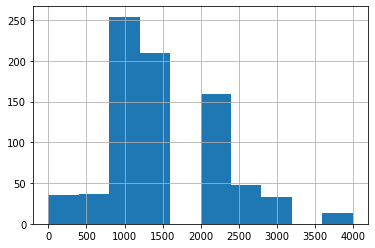

In [14]:
ETP_teacher[ETP_teacher.etpgroup=='ETP'].ptatchsalary1_2005.hist()

In [15]:
ETP_teacher[ETP_teacher.etpgroup=='ETP'].ptatchsalary1_2005.mean()

1443.0749682337992

In [18]:
ETP_teacher[ETP_teacher.etpgroup=='ETP']['ptatchperiod1_2005']

1       MONTH
2       MONTH
6       MONTH
7            
11      MONTH
        ...  
2936    MONTH
2937    MONTH
2938    MONTH
2939    MONTH
2940    MONTH
Name: ptatchperiod1_2005, Length: 1577, dtype: object

In [19]:
1443*12

17316

In [49]:
1443*18

25974

In [53]:
ETP_main.init_clsize.mean()

85.05738067626953

In [55]:
ETP_main[ETP_main['etpgroup'] == 'ETP'].init_clsize.mean()

87.94534301757812

In [59]:
ETP_main[ETP_main.tracking==1]

,pupilid,schoolid,baseline,district,bungoma,etpschool,tracking,sbm,girl,etpschool_girl,...,std_letterscore,std_wordscore,std_sentscore,std_spellscore,std_additions_score,std_substractions_score,std_multiplications_score,schoolPTR,total_1,total_2
0,4301003,430,1,BUNGOMA,1,1,1,1,1,1,...,-1.075680,-0.698297,0.362425,-0.621864,-1.056541,-0.821877,-0.565649,45.846153,111.0,86.0
1,4301001,430,1,BUNGOMA,1,1,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.846153,111.0,86.0
2,4301005,430,1,BUNGOMA,1,1,1,1,0,0,...,-0.545307,-0.698297,-0.642568,-0.621864,0.343626,1.089532,-0.565649,45.846153,111.0,86.0
3,4301019,430,1,BUNGOMA,1,1,1,1,0,0,...,-1.075680,-0.698297,-0.307570,-0.621864,-0.589819,-1.299729,-0.565649,45.846153,111.0,86.0
4,4301012,430,1,BUNGOMA,1,1,1,1,0,0,...,0.462402,-0.698297,0.194926,-0.621864,-0.123096,0.133828,1.353673,45.846153,111.0,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12213,10201051,1020,1,BUNGOMA,1,1,1,1,0,0,...,0.197216,2.323765,0.697423,1.450668,1.277071,1.567384,2.313334,32.099998,56.0,60.0
12214,10201034,1020,1,BUNGOMA,1,1,1,1,0,0,...,-0.704419,-0.698297,-0.642568,-0.621864,0.810349,1.089532,-0.565649,32.099998,56.0,60.0
12215,10201038,1020,1,BUNGOMA,1,1,1,1,0,0,...,1.629223,2.323765,1.032420,1.105246,0.343626,1.089532,2.313334,32.099998,56.0,60.0
12216,10201055,1020,1,BUNGOMA,1,1,1,1,1,1,...,1.841373,2.323765,5.387391,2.141512,1.743794,1.089532,2.313334,32.099998,56.0,60.0


In [62]:
ETP_main[ETP_main.tracking==1].streamsize.mean()

43.2580875356803

In [63]:
ETP_main[ETP_main['etpgroup'] == 'ETP'].streamsize.mean()

44.30353173623117

In [65]:
ETP_main[ETP_main['etpgroup'] != 'ETP'].streamsize.mean()

82.83053867962737